In [1]:
%matplotlib inline

import glob
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import signal
from sklearn.decomposition import PCA

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The first step is to find which rows of the locations df correspond to differentially bound regions. 

We start by loading the locations dataset

In [2]:
locations_df=pd.read_csv("Locations")
locations_df.columns = ["a", "chr","start","end"]
del locations_df["a"]
locations_df.head()

,chr,start,end
0,211000022278049,390,394
1,211000022278049,537,541
2,211000022278049,573,577
3,211000022278049,837,841
4,211000022278049,1613,1617


The following dataframe of differentially expressed genes for carcass was created in 20160731_Including_heterochromatic_state.ipynb

In [3]:
diff_expression_df=pd.read_csv("Differentially_expressed_genes_carcass_df")
diff_expression_df.head()

,Unnamed: 0,chr,start,end
0,0,X,245978,254650
1,1,X,585081,620195
2,2,X,946662,947500
3,3,X,2278031,2293411
4,4,X,2622069,2624575


Now we want to find which locations are differentially expressed

In [4]:
locations_df["contains_diff_expressed"]=[0 for ele in locations_df['chr']]
for i,row1 in enumerate(diff_expression_df.iterrows()):
    print i,
    key = str(row1[1]['chr'])     
    subset_chrom_df=locations_df[locations_df.chr == key]
    len_subset_chrom_df = subset_chrom_df.shape[0]
    for j in range(len_subset_chrom_df):
        try:
            if float(row1[1]['end']) >= float(subset_chrom_df.loc[subset_chrom_df.index[j],'end']) and float(row1[1]['start']) <= float(subset_chrom_df.loc[subset_chrom_df.index[j],'start']) :
                #print list(row1[1]), subset_chrom_df.index[j]
                
                locations_df.ix[subset_chrom_df.index[j], 'contains_diff_expressed']=str(list(row1[1]))
                    #diff_expression_df.ix[i,'chromatin_state'] = subset_chrom_df.ix[subset_chrom_df.index[j],'chromatin']
        except:
            pass

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [33]:
locations_df.ix[310020,]

chr                                               X
start                                        250162
end                                          250166
contains_diff_expressed    [0, 'X', 245978, 254650]
Name: 310020, dtype: object

In [7]:
locations_df[locations_df.contains_diff_expressed!=0].tail()

,chr,start,end,contains_diff_expressed
373894,X,22534746,22534750,"[298, 'X', 22529964, 22536371]"
373895,X,22535316,22535320,"[298, 'X', 22529964, 22536371]"
373896,X,22535972,22535976,"[298, 'X', 22529964, 22536371]"
373897,X,22536070,22536074,"[298, 'X', 22529964, 22536371]"
373898,X,22536273,22536277,"[298, 'X', 22529964, 22536371]"


In [8]:
#locations_df.to_csv("locations_df_with_diff_expressed", sep=";")

Now we want to find which locations are differentially bound

In [10]:
lpadj=[]
lpval=[]
for f1 in glob.glob("nbin*"):
    df_padj = pd.read_csv(f1).padj
    df_pval = pd.read_csv(f1).pvalue
    lpadj.append(df_padj)
    lpval.append(df_pval)
pval = pd.concat(lpval, axis = 1)
padj = pd.concat(lpadj, axis = 1)

pval.columns= map(lambda x: x[25:], glob.glob("nbin*"))
pval.head()

padj.columns= map(lambda x: x[25:], glob.glob("nbin*"))
padj.head()

,C_D1,C_Lam,T_D1,T_Lam,W_D1,W_Lam
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
len(pval)

388464

In [12]:
len(locations_df)

388464

In [31]:
print "Mean adjusted p-vals for differential binding conditioning on non diff expressed gene locations"
print padj[locations_df.contains_diff_expressed==0].mean()
print "conditioning on diff expressed gene locations"
print padj[locations_df.contains_diff_expressed!=0].mean()

Mean adjusted p-vals for differential binding conditioning on non diff expressed gene locations
C_D1     0.595955
C_Lam    0.408171
T_D1     0.382093
T_Lam    0.493926
W_D1     0.985443
W_Lam    0.935777
dtype: float64
conditioning on diff expressed gene locations
C_D1     0.610274
C_Lam    0.386429
T_D1     0.416556
T_Lam    0.490505
W_D1     0.986447
W_Lam    0.946208
dtype: float64


In [32]:
print "Mean p-vals for differential binding conditioning on non diff expressed gene locations"
print pval[locations_df.contains_diff_expressed==0].mean()
print "conditioning on diff expressed gene locations"
print pval[locations_df.contains_diff_expressed!=0].mean()

Mean p-vals for differential binding conditioning on non diff expressed gene locations
C_D1     0.513809
C_Lam    0.348400
T_D1     0.603628
T_Lam    0.441822
W_D1     0.545073
W_Lam    0.547549
dtype: float64
conditioning on diff expressed gene locations
C_D1     0.490584
C_Lam    0.299476
T_D1     0.573320
T_Lam    0.409605
W_D1     0.544514
W_Lam    0.550403
dtype: float64


plots of the p-vals (testing differential binding in different protein by tissue combos)


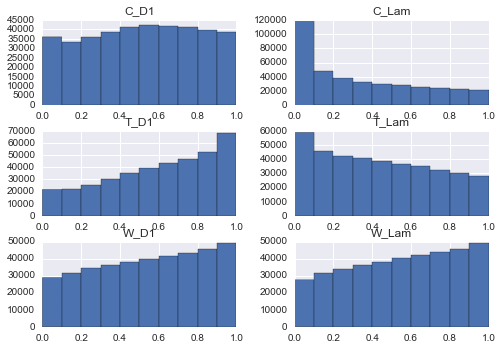

plots of the p-adj (testing differential binding in different protein by tissue combos)


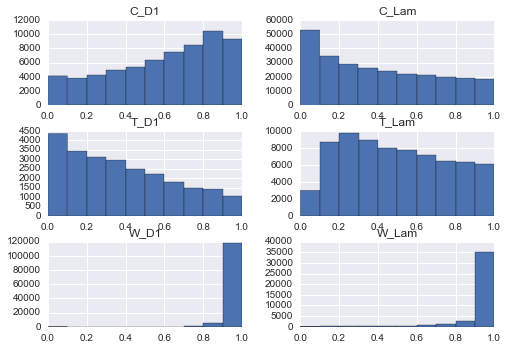

In [24]:
print "plots of the p-vals (testing differential binding in different protein by tissue combos)"
_=pval.hist()
plt.show()
print "plots of the p-adj (testing differential binding in different protein by tissue combos)"
_=padj.hist()

The hist of the p-adj look very different from the plots of the pvals.  Tim: which should I be looking at?

p-adj (testing differential binding in different protein by tissue combos) for non diff expressed genes


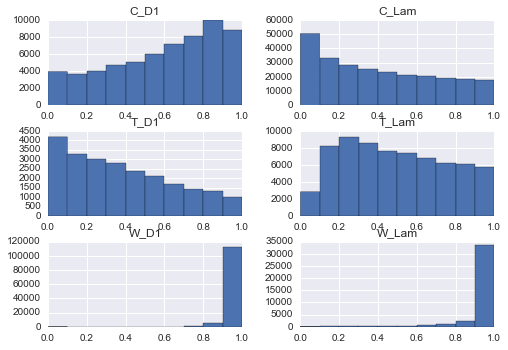

p-adj (testing differential binding in different protein by tissue combos) for diff expressed genes


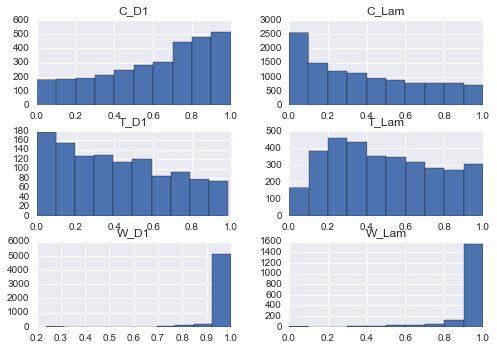

In [25]:
print "p-adj (testing differential binding in different protein by tissue combos) for non diff expressed genes"
_=padj[locations_df.contains_diff_expressed==0].hist()
plt.show()
print "p-adj (testing differential binding in different protein by tissue combos) for diff expressed genes"
_=padj[locations_df.contains_diff_expressed!=0].hist()


you can't really see a difference between the shapes of these distributions

p-val (testing differential binding in different protein by tissue combos) for non diff expressed genes


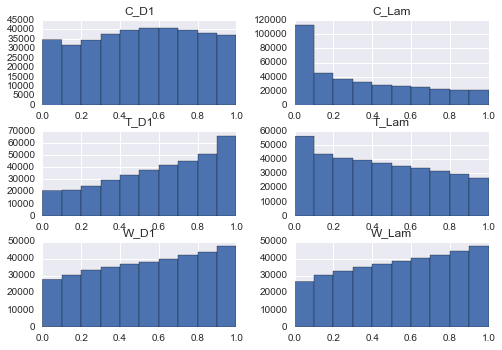

p-val (testing differential binding in different protein by tissue combos) for diff expressed genes


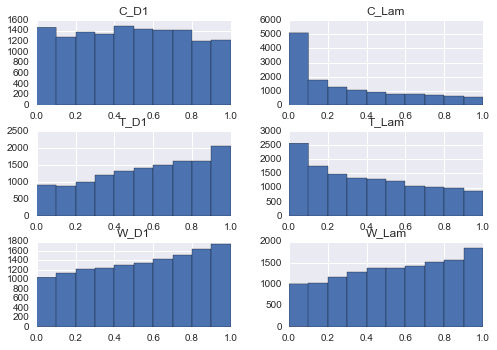

In [27]:
print "p-val (testing differential binding in different protein by tissue combos) for non diff expressed genes"
_=pval[locations_df.contains_diff_expressed==0].hist()
plt.show()
print "p-val (testing differential binding in different protein by tissue combos) for diff expressed genes"
_=pval[locations_df.contains_diff_expressed!=0].hist()



shapes are pretty consistent.  We're going to run a 2-sample Kolmogorov-Smirnov test though to test whether they are actually different (mean p-values look lower for the significant binding, which is what we would expect).

In [45]:
import scipy.stats
print "tissue_protein, not diff expressed mean diff binding p-val, diff expressed mean diff binding p-val"
for col in pval.columns:
    print col, pval[locations_df.contains_diff_expressed==0][col].mean(), pval[locations_df.contains_diff_expressed!=0][col].mean()
    print "Larger p-val for diff expressed?", pval[locations_df.contains_diff_expressed==0][col].mean() < pval[locations_df.contains_diff_expressed!=0][col].mean()
    print scipy.stats.ks_2samp(pval[locations_df.contains_diff_expressed==0][col], pval[locations_df.contains_diff_expressed!=0][col])

tissue_protein, not diff expressed mean diff binding p-val, diff expressed mean diff binding p-val
C_D1 0.513808761405 0.490583554236
Larger p-val for diff expressed? False
Ks_2sampResult(statistic=0.035773902207635544, pvalue=4.5821846623597786e-15)
C_Lam 0.348400121508 0.299476024508
Larger p-val for diff expressed? False
Ks_2sampResult(statistic=0.079648311377415459, pvalue=5.3764360012101313e-73)
T_D1 0.603628449082 0.573319928554
Larger p-val for diff expressed? False
Ks_2sampResult(statistic=0.046090586312393489, pvalue=9.9910283913075999e-25)
T_Lam 0.441822032408 0.409604729781
Larger p-val for diff expressed? False
Ks_2sampResult(statistic=0.053126288494897866, pvalue=1.0331083641262233e-32)
W_D1 0.545073050612 0.54451354959
Larger p-val for diff expressed? False
Ks_2sampResult(statistic=0.0084562590666205084, pvalue=0.30302689128402893)
W_Lam 0.547548680377 0.550403251711
Larger p-val for diff expressed? True
Ks_2sampResult(statistic=0.012832277434461248, pvalue=0.026140647248

In [46]:
for col in padj.columns:
    print col, 
    print padj[locations_df.contains_diff_expressed==0][col].mean(), padj[locations_df.contains_diff_expressed!=0][col].mean()
    print "Larger p-val for diff expressed?", padj[locations_df.contains_diff_expressed==0][col].mean() < padj[locations_df.contains_diff_expressed!=0][col].mean()
    print scipy.stats.ks_2samp(padj[locations_df.contains_diff_expressed==0][col], padj[locations_df.contains_diff_expressed!=0][col])

C_D1 0.595954959072 0.610274157102
Larger p-val for diff expressed? True
Ks_2sampResult(statistic=0.058628367080588051, pvalue=9.5541204383529632e-40)
C_Lam 0.408171042867 0.386429452048
Larger p-val for diff expressed? False
Ks_2sampResult(statistic=0.14236942127396368, pvalue=2.7110264886046745e-232)
T_D1 0.382093457776 0.416555969511
Larger p-val for diff expressed? True
Ks_2sampResult(statistic=0.022952963410752439, pvalue=1.8804366232326215e-06)
T_Lam 0.493926135818 0.490504942035
Larger p-val for diff expressed? False
Ks_2sampResult(statistic=0.059681680442500218, pvalue=3.5861441715314506e-41)
W_D1 0.985442776192 0.986447351386
Larger p-val for diff expressed? True
Ks_2sampResult(statistic=0.083634061079247424, pvalue=1.9303451687610417e-80)
W_Lam 0.935776632146 0.946208175356
Larger p-val for diff expressed? True
Ks_2sampResult(statistic=0.028191148369410363, pvalue=1.6202765973385386e-09)


The p-val results are consistent with what we would expect.  the adjusted p-val results are not

In [26]:
locations_df[locations_df.contains_diff_expressed!=0].tail(n=10)

,chr,start,end,contains_diff_expressed
373889,X,22533068,22533072,"[298, 'X', 22529964, 22536371]"
373890,X,22533108,22533112,"[298, 'X', 22529964, 22536371]"
373891,X,22533257,22533261,"[298, 'X', 22529964, 22536371]"
373892,X,22533415,22533419,"[298, 'X', 22529964, 22536371]"
373893,X,22533864,22533868,"[298, 'X', 22529964, 22536371]"
373894,X,22534746,22534750,"[298, 'X', 22529964, 22536371]"
373895,X,22535316,22535320,"[298, 'X', 22529964, 22536371]"
373896,X,22535972,22535976,"[298, 'X', 22529964, 22536371]"
373897,X,22536070,22536074,"[298, 'X', 22529964, 22536371]"
373898,X,22536273,22536277,"[298, 'X', 22529964, 22536371]"
